## Import important libraries

In [1]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the .arff file
connect_4_dataset = arff.loadarff('../connect-4.arff')

# Convert to a numpy array
data = np.asarray(connect_4_dataset[0].tolist(), dtype=np.float32)

In [3]:
X = data[:, :-1]
y = data[:, -1:]

# Extract X values - 42 features
print('X:' + str(X.shape))

# Extract y values - 1 outcome
print('y:' + str(y.shape))

X:(67557, 42)
y:(67557, 1)


In [4]:
# Splitting the dataset 

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,   
    test_size = 0.07, random_state=10, shuffle=True
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.07, random_state=10, shuffle=True
)

y_train = y_train.ravel()
y_test = y_test.ravel()
y_val = y_val.ravel()

# ! No need to scale since the data is already the same scale

In [5]:
# Check to make sure everything is as expected
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))

X_train:(58430, 42)
y_train:(58430,)
X_val: 	(4398, 42)
y_val: 	(4398,)
X_test: (4729, 42)
y_test: (4729,)


In [6]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))


In [9]:
# Check to make sure everything is as expected
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))

X_train:(58430, 43)
y_train:(58430,)
X_val: 	(4398, 43)
y_val: 	(4398,)
X_test: (4729, 43)
y_test: (4729,)


## Step x: One vs Rest encoding 
The original labels are '0', '1', '2'. Our SVM algorithm Pegasos expects the labels to be encoded as +1 and -1

Here we encode one digit as 1, and we encode the other 2 digits as -1

In [10]:
def one_vs_rest_encoding(y, digit = '0'):
    y_encoded = np.where(y == int(digit), 1, -1)
    return  y_encoded

In [11]:
# Perform the encoding for step 1's task
y_train_0_vs_rest = one_vs_rest_encoding(y_train, '0')
y_val_0_vs_rest =  one_vs_rest_encoding(y_val, '0')

In [12]:
print('y_train_0_vs_rest: ' + str(y_train_0_vs_rest))


y_train_0_vs_rest: [-1  1 -1 ... -1 -1 -1]


In [13]:
# Create the 3 classifiers
labels = "012"
w_vals = {}
val_scores = {}
for i in range(len(labels)):
    # Note that each section may require more than one line of code.

    # Perform one-vs-rest for labels[i]
    # To do: Relabel the y labels in the train set to either 1 or -1 using one_vs_rest_encoding
    y_encoded = one_vs_rest_encoding(y_train, labels[i])

    poly = PolynomialFeatures(3) # * generate all types of polynomial features up to degree d
    X_tr_poly = poly.fit_transform(X_train) # * transforms the training data to have those polynomial features
    
    logreg = LogisticRegression()
    logreg.fit(X_tr_poly, y_encoded)
    
    w_vals[i] = logreg.coef_
    ## TODO add intercept to w_vals[i]
    # w_vals[i] = np.append(w_vals[i], svm_algo.intercept_)
            
    X_val_poly = poly.transform(X_val) # * transforms the validation data to have those polynomial features

    y_pred_val = logreg.predict(X_val_poly)

    y_encoded_val = one_vs_rest_encoding(y_val, labels[i])


    # compute the accuracy of the classifier
    val_accuracy = accuracy_score(y_encoded_val, y_pred_val)

    val_scores[i] = val_accuracy


c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [14]:
# Check your work. With the proper amount of iterations, your values should range from 0.95 to 0.99  
for i in range(len(labels)):
     print(i,": score:", val_scores[i])

0 : score: 0.9047294224647567
1 : score: 0.870168258299227
2 : score: 0.848112778535698


In [21]:
# To do: Predict the label for each example in the validation set 
# We will let eval be a numpy array of length N, where N is the number of examples in the validation set. 
# eval1 will hold either a 1 or a 0, depending if the handwritten digit was predicted correctly or not.
eval1 = np.zeros(len(y_val))

# To do: Loop through each sample in the validation set and assign it a label based on the highest score. 
# Store either a 1 if the number was predicted correctly, or a 0 if the number was predicted incorrectly.
for i in range(len(X_val)):
    
    label_scores = np.zeros(len(labels))
    
    for j in range(len(labels)):
        X_val_i_2d = X_val_poly[i].reshape(1, -1)  # reshape X_val to a 2D array with shape (1, 43)
        label_scores[j] = X_val_i_2d @ w_vals[j].T
    
    index_label_max_score = np.argmax(label_scores) # get the index of the label with the highest score

    if int(labels[index_label_max_score]) == int(y_val[i]):
        eval1[i] = 1
    else:
        eval1[i] = 0

In [29]:
# Print the accuracy score as a percentage
print("Accuracy Score: {:.2%}".format(accuracy))

Accuracy Score: 80.83%


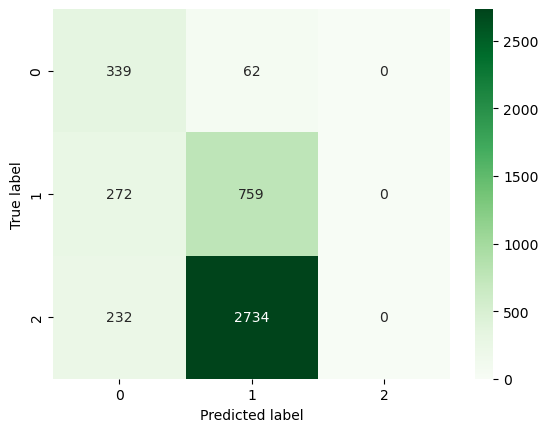

In [26]:

# Create the confusion matrix
conf_mat = confusion_matrix(y_val, eval1)

# Visualize the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [18]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_val, eval1))


              precision    recall  f1-score   support

         0.0       0.40      0.85      0.55       401
         1.0       0.21      0.74      0.33      1031
         2.0       0.00      0.00      0.00      2966

    accuracy                           0.25      4398
   macro avg       0.21      0.53      0.29      4398
weighted avg       0.09      0.25      0.13      4398



c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu